# Lampiran

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')


In [2]:
data = pd.read_csv(r'C:\Users\hp\Downloads\UAS DATA ANALYSIS\data_uas.csv')
data.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2       12.9           30    8735         54  
3        7.7           37   19016         59  
4       11.9            2   10922         15

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      1047 non-null   object 
 1   apps         1047 non-null   int64  
 2   accept       1047 non-null   int64  
 3   enroll       1047 non-null   int64  
 4   top10perc    1047 non-null   int64  
 5   top25perc    1047 non-null   int64  
 6   f_undergrad  1047 non-null   int64  
 7   p_undergrad  1047 non-null   int64  
 8   outstate     1047 non-null   int64  
 9   room_board   1047 non-null   int64  
 10  books        1047 non-null   int64  
 11  personal     1047 non-null   int64  
 12  phd          1047 non-null   int64  
 13  terminal     1047 non-null   int64  
 14  s_f_ratio    1047 non-null   float64
 15  perc_alumni  1047 non-null   int64  
 16  expend       1047 non-null   int64  
 17  grad_rate    1047 non-null   int64  
dtypes: float64(1), int64(16), object(1)
memory usage

In [4]:
pd.set_option('display.float', '{:.2f}'.format)
data.describe()

apps   accept   enroll  top10perc  top25perc  f_undergrad  \
count  1047.00  1047.00  1047.00    1047.00    1047.00      1047.00   
mean   5101.44  3797.29  2418.11      32.33      55.66      5645.87   
std    5655.09  4335.36  3422.81      20.23      21.30      5872.97   
min      81.00    72.00    35.00       1.00       9.00       139.00   
25%     921.00   729.00   294.50      17.00      39.00      1148.00   
50%    2417.00  1729.00   640.00      26.00      54.00      2885.00   
75%    7801.00  5385.00  2975.50      43.00      70.50      8967.00   
max   48094.00 26330.00 13395.00      96.00     100.00     31643.00   

       p_undergrad  outstate  room_board   books  personal     phd  terminal  \
count      1047.00   1047.00     1047.00 1047.00   1047.00 1047.00   1047.00   
mean       2215.88   9263.63     4163.43  563.43   1548.70   67.79     77.44   
std        3170.46   4107.95     1131.89  186.14    847.99   21.15     15.58   
min           1.00   2340.00     1780.00   96.00    250.00    8.00     24.00   
25%         156.00   6289.50     3398.00  450.00    900.00   56.00     66.50   
50%         701.00   8530.00     4080.00  540.00   1350.00   72.00     80.00   
75%        2931.00  11690.00     4851.50  637.50   1999.50   84.00     90.50   
max       21836.00  21700.00     8124.00 2340.00   6800.00  103.00    100.00   

       s_f_ratio  perc_alumni   expend  grad_rate  
count    1047.00      1047.00  1047.00    1047.00  
mean       15.44        20.90  9696.45      63.42  
std         4.70        11.93  4863.09      18.76  
min         2.50         0.00  3186.00      10.00  
25%        12.10        11.50  6744.50      50.50  
50%        14.60        19.00  8595.00      64.00  
75%        18.40        28.00 11506.00      77.00  
max        39.80        64.00 56233.00     118.00

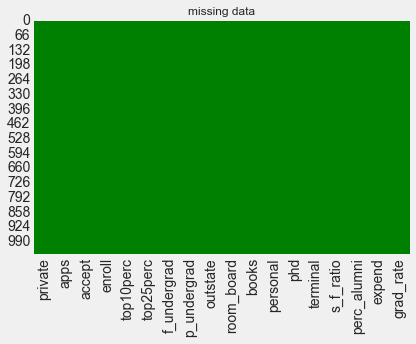

In [5]:
# Plot to show missing data
sns.heatmap(data.isnull(), cbar=False, cmap="ocean")
sns.set(rc = {'figure.figsize':(20,8)})
plt.title('missing data')
plt.show()

## Exploratory Data Analysis

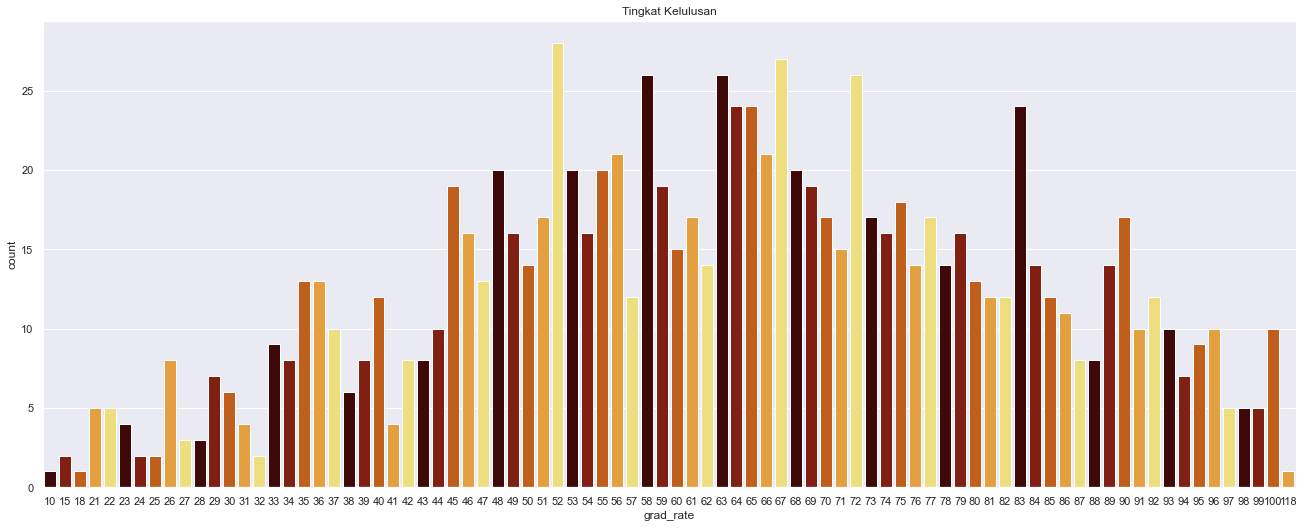

In [6]:
#Count Plot
colors = sns.color_palette('afmhot') [0:5]
#define the viz function
sns.countplot(x='grad_rate', data=data, palette=colors)
#define title
plt.title('Tingkat Kelulusan')
plt.show()

<AxesSubplot:xlabel='private', ylabel='personal'>

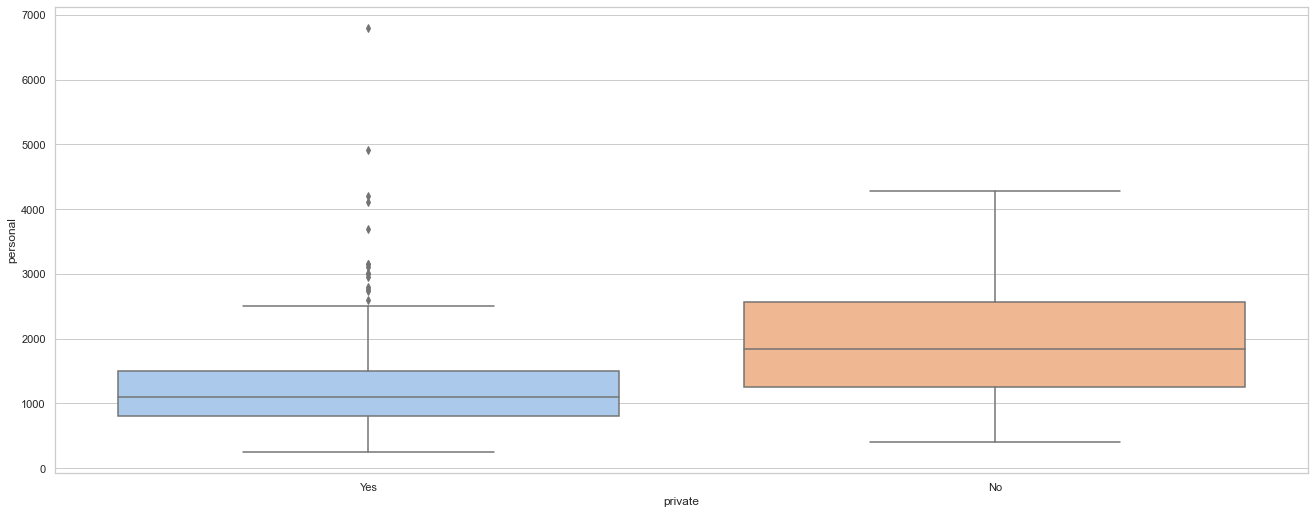

In [7]:
# Box Plot
sns.set_theme(style="whitegrid")
sns.boxplot(x='private', y='personal', data=data, palette="pastel")

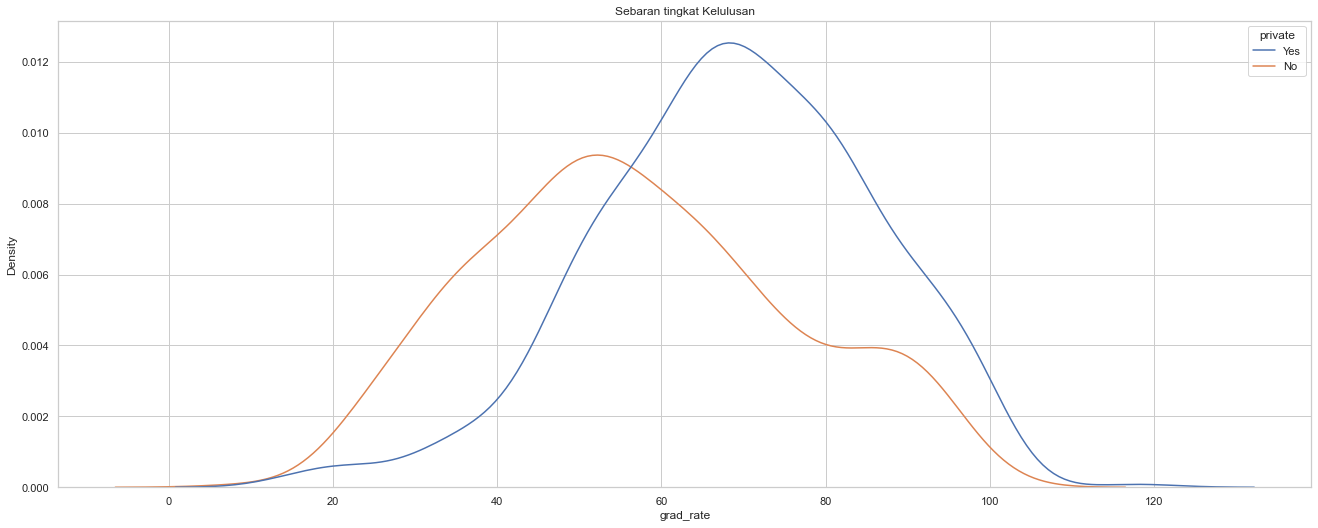

In [8]:
# Line KDE Plot
sns.kdeplot(x='grad_rate' ,hue='private', data=data)
plt.title('Sebaran tingkat Kelulusan')
plt.show()

<AxesSubplot:xlabel='accept', ylabel='enroll'>

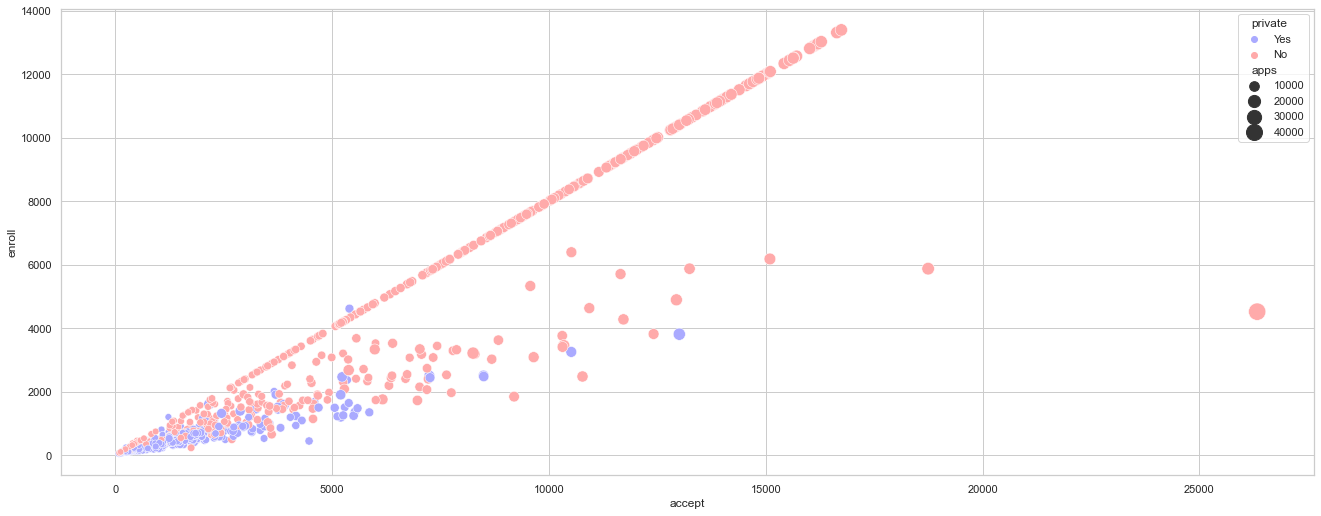

In [9]:
# scatter plot
sns.scatterplot(data=data, x="accept", y="enroll",
                hue="private", size="apps" ,
                sizes=(40, 300), palette="bwr")

<AxesSubplot:xlabel='terminal', ylabel='phd'>

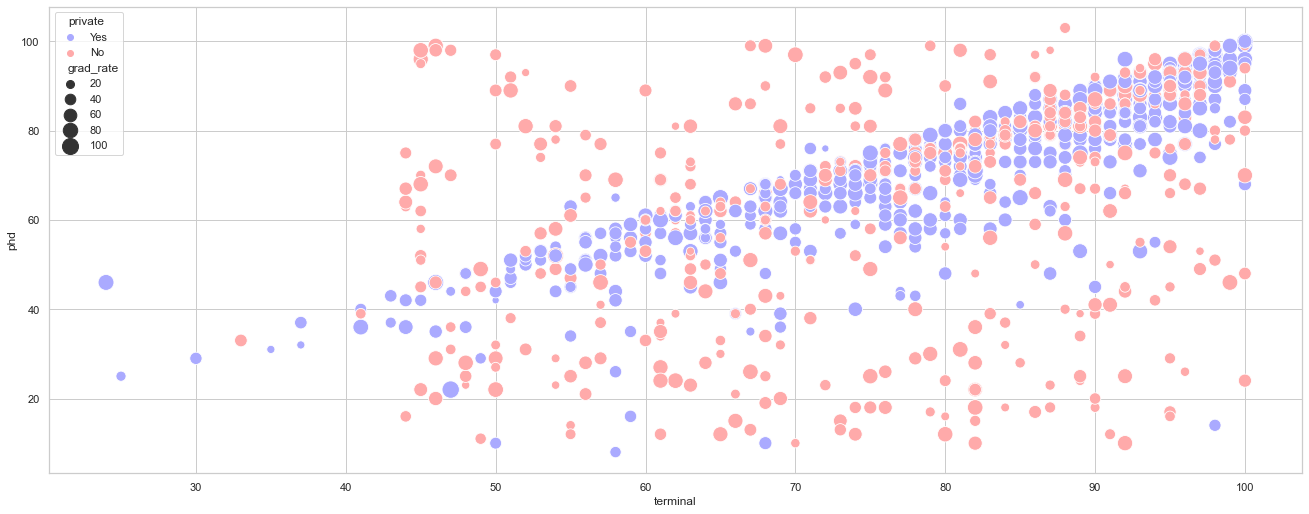

In [10]:
# scatter plot
sns.scatterplot(data=data, x="terminal", y="phd",
                hue="private", size="grad_rate" ,
                sizes=(40, 300), palette="bwr")

<AxesSubplot:>

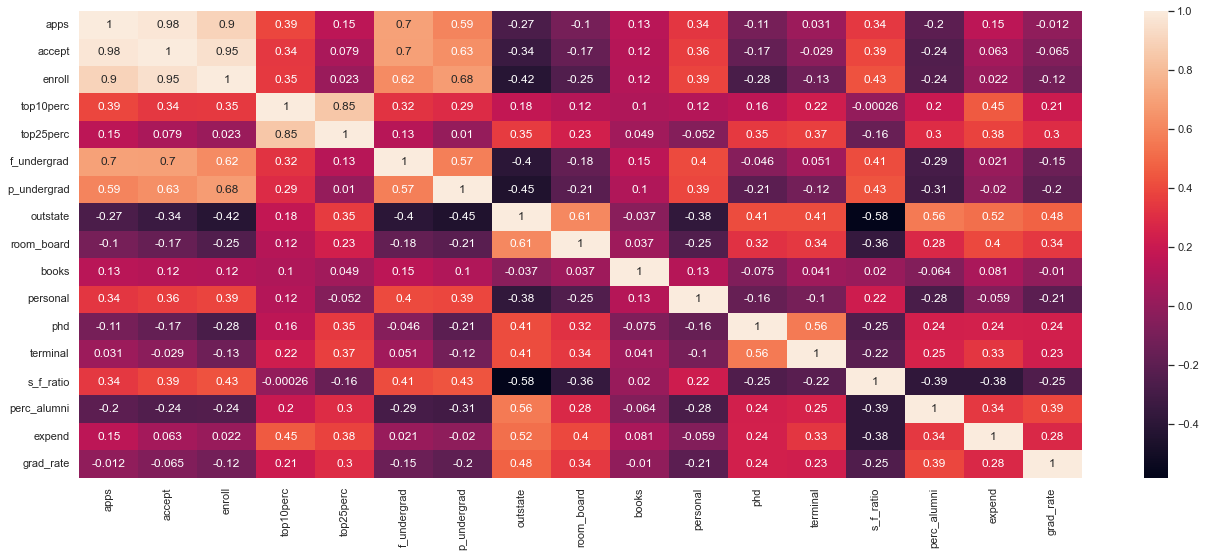

In [11]:
# Heat map will be further discussed at EDA
sns.heatmap(data.corr(), annot=True)

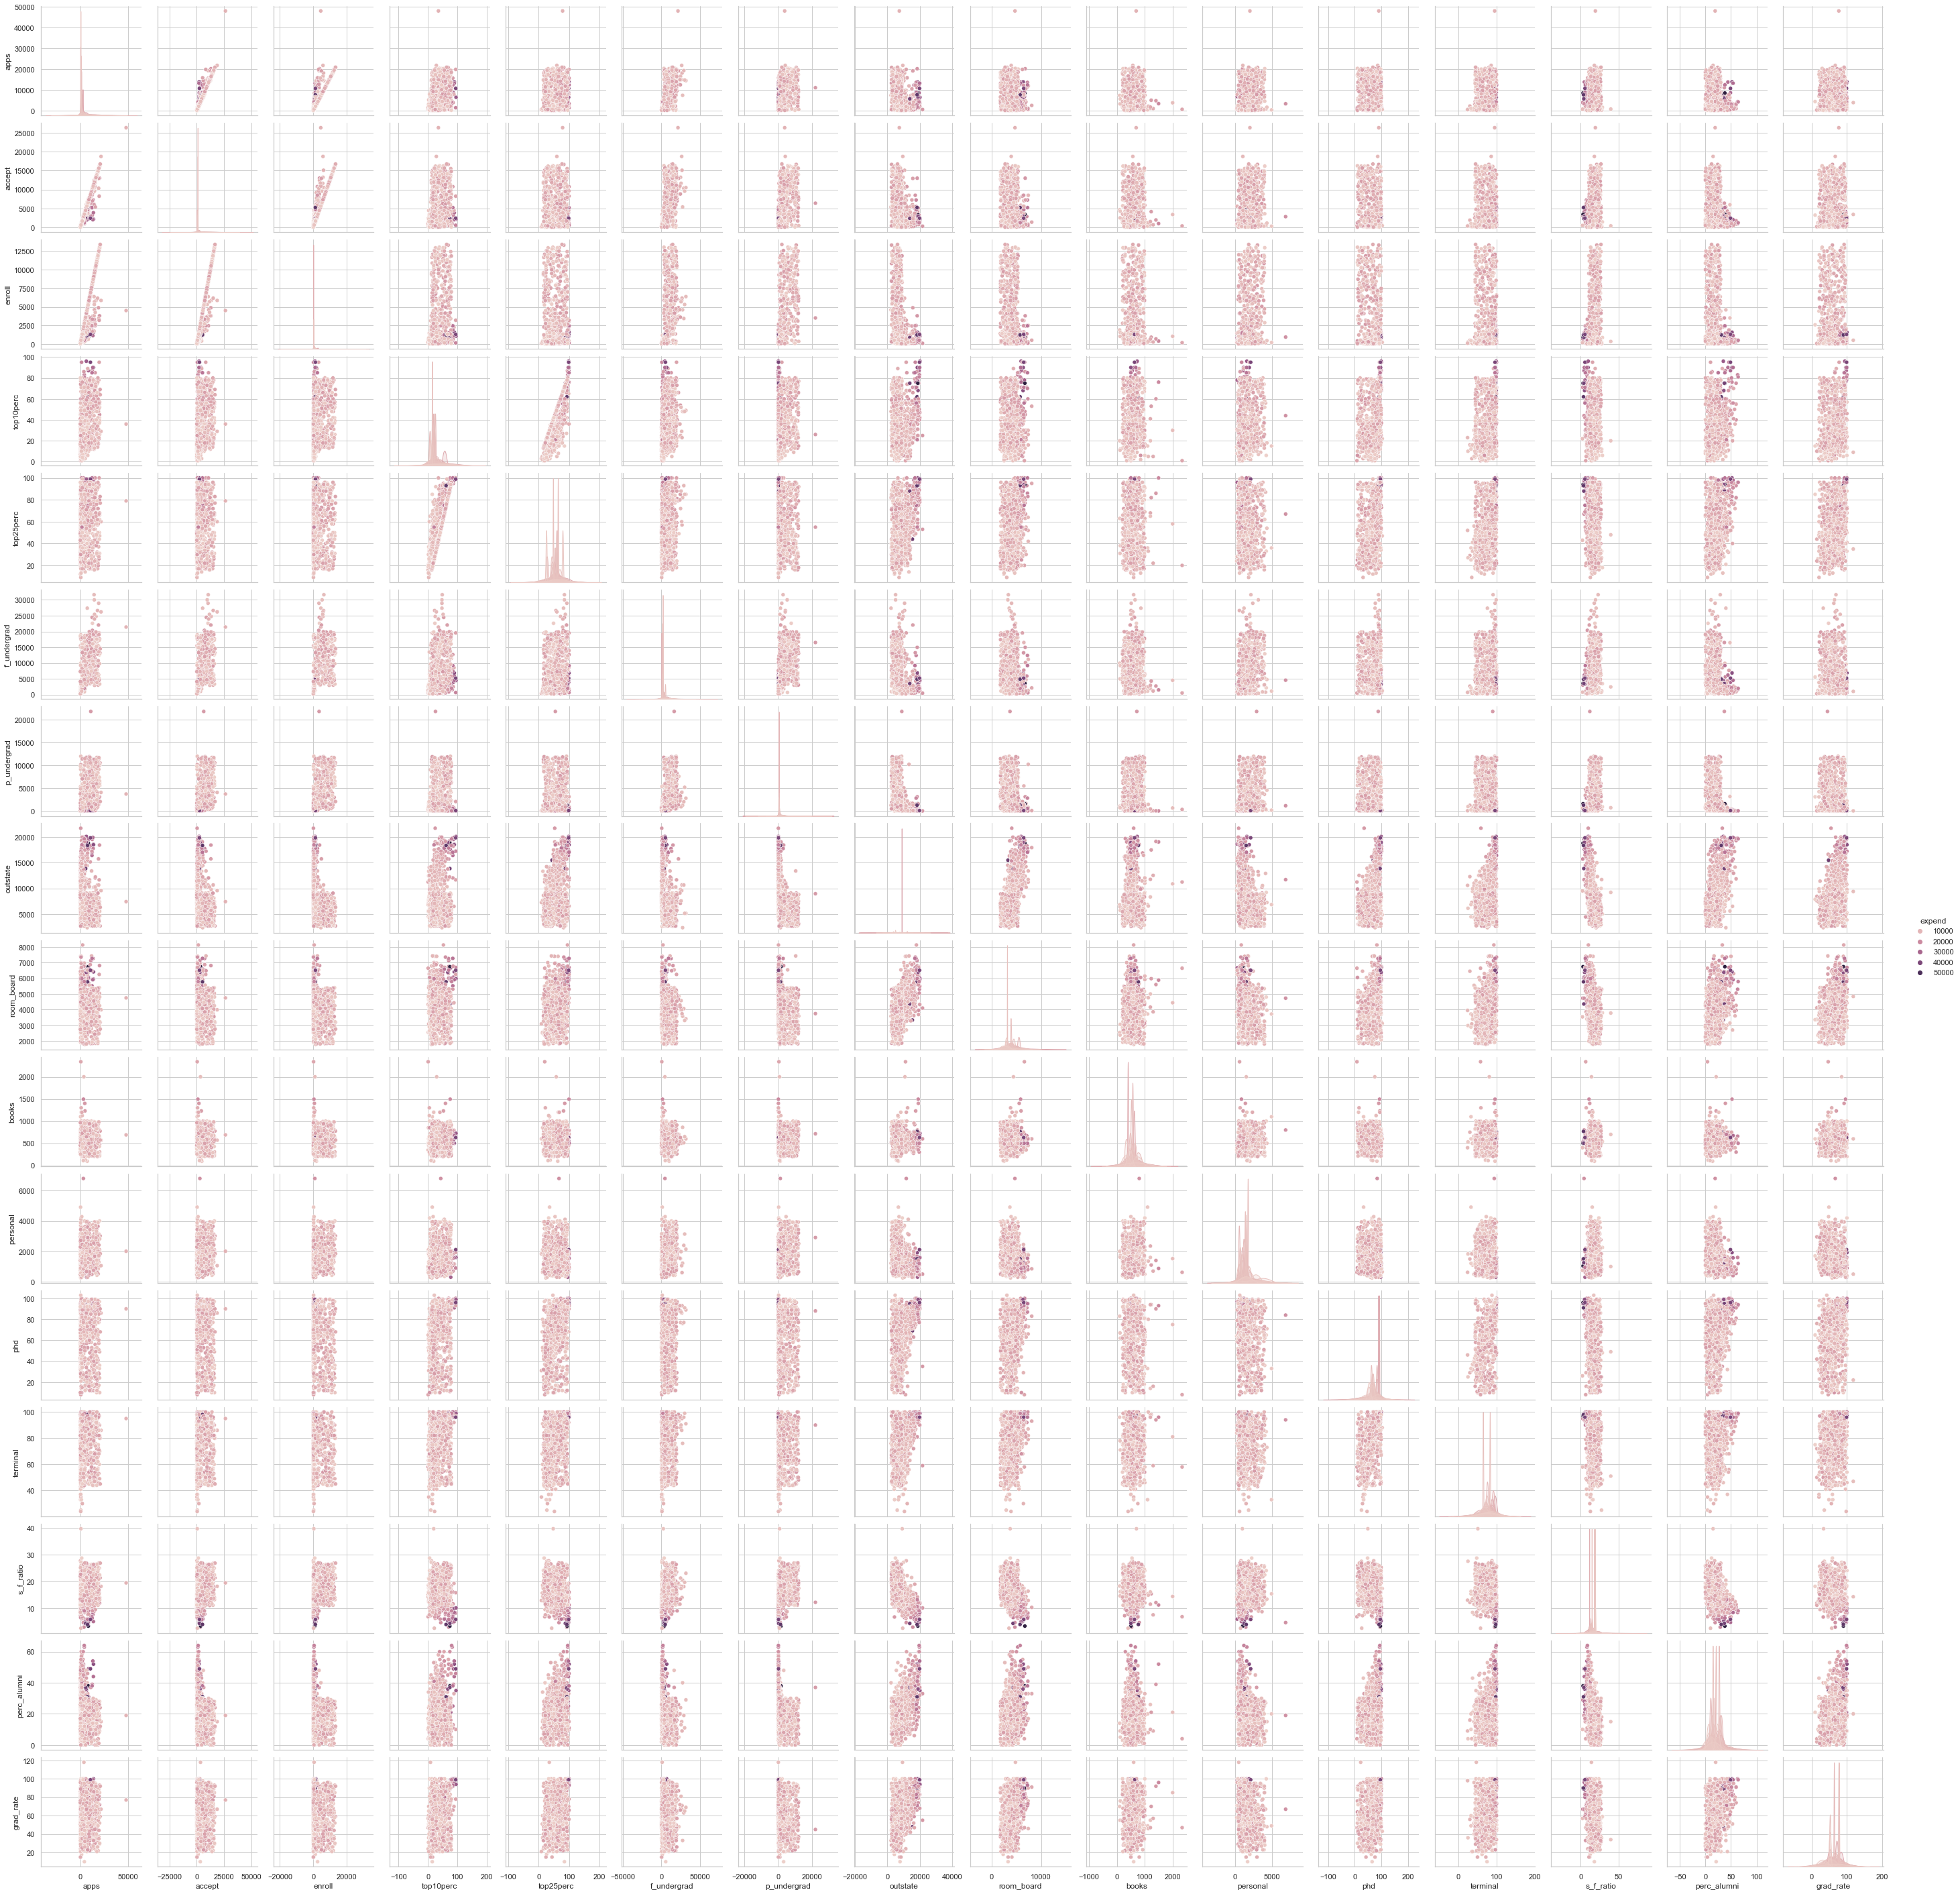

In [12]:
sns.pairplot(data=data, dropna=True, hue="expend")

<AxesSubplot:xlabel='room_board', ylabel='grad_rate'>

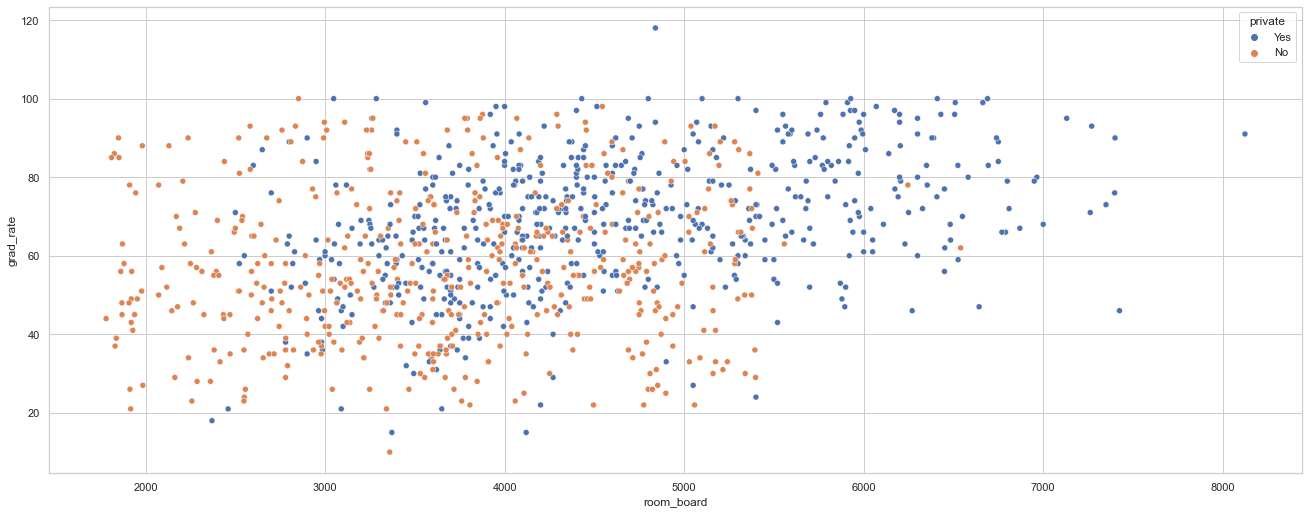

In [13]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='room_board', y='grad_rate', data=data, hue='private')

<AxesSubplot:xlabel='outstate', ylabel='f_undergrad'>

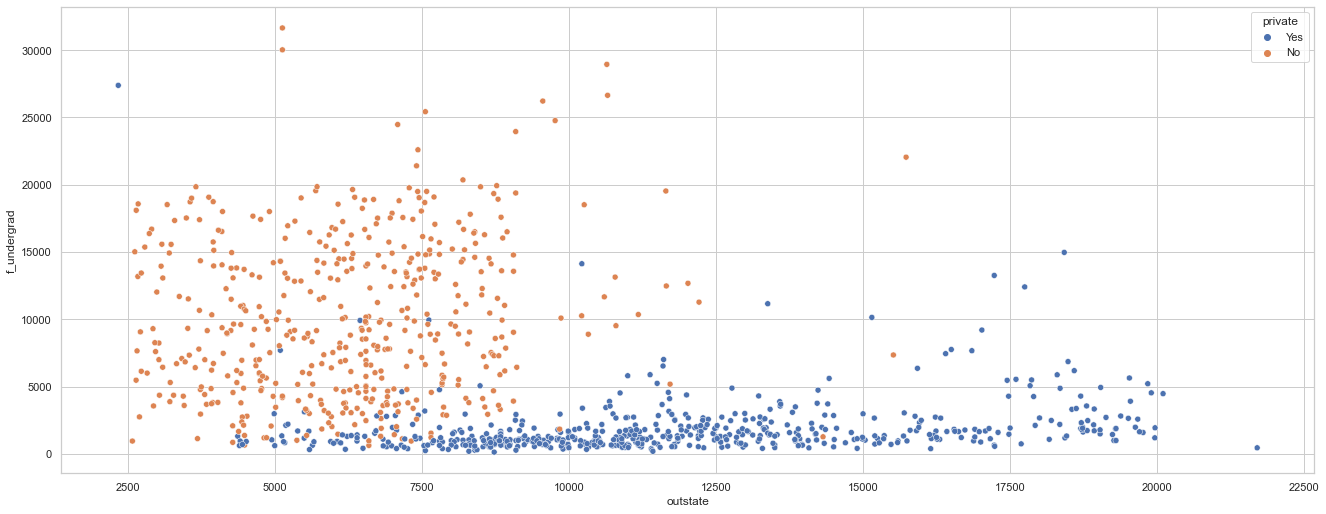

In [14]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='outstate', y='f_undergrad', data=data, hue='private')

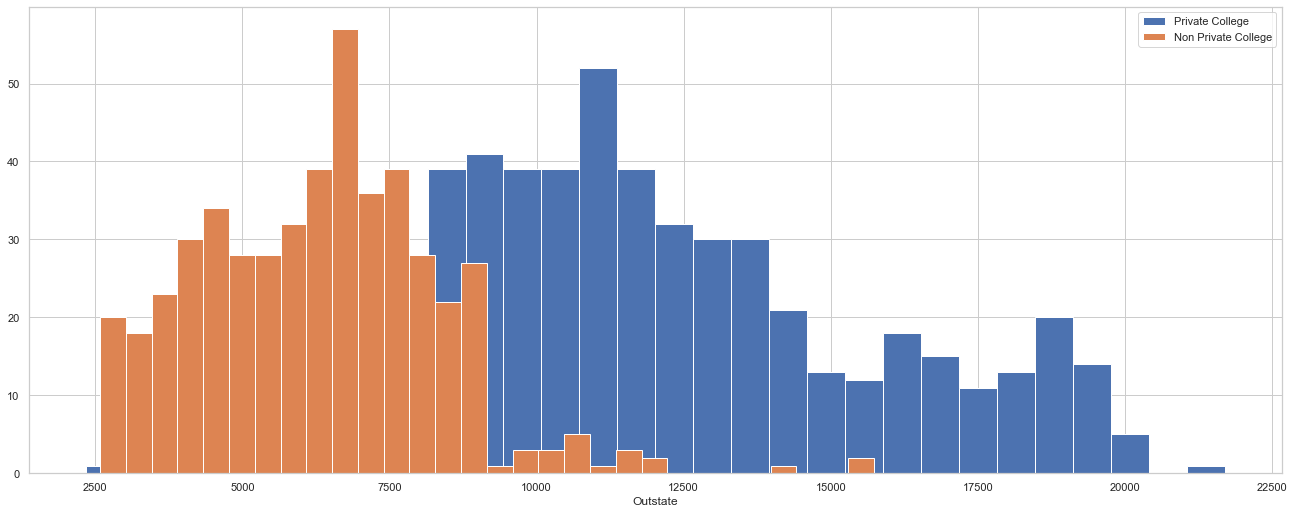

In [15]:
plt.figure(figsize=(20, 8))

data.loc[data.private == 'Yes', 'outstate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'outstate'].hist(label="Non Private College", bins=30)

plt.xlabel('Outstate')
plt.legend()

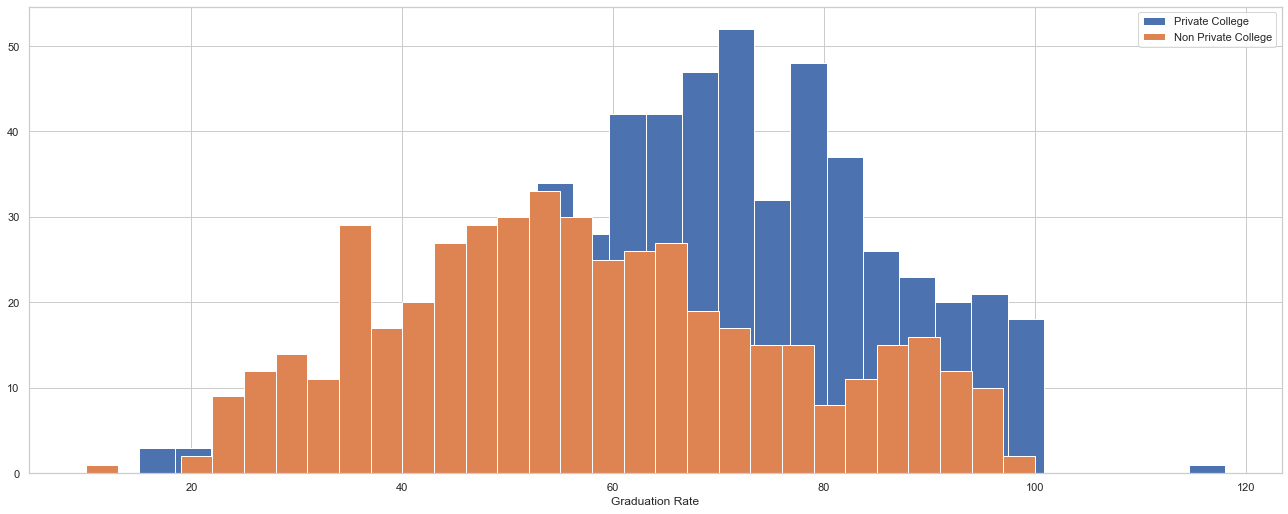

In [16]:
plt.figure(figsize=(20, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

In [17]:
# Terdapat kejanggalan berupa graduation rate yang lebih tinggi dari 100% diubah menjadi 100%
data.loc[data.grad_rate > 100]

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
95     Yes  3847    3433     527          9         35         1010   

    p_undergrad  outstate  room_board  books  personal  phd  terminal  \
95           12      9384        4840    600       500   22        47   

    s_f_ratio  perc_alumni  expend  grad_rate  
95      14.30           20    7697        118

In [18]:
data.loc[data.grad_rate > 100, 'grad_rate'] = 100

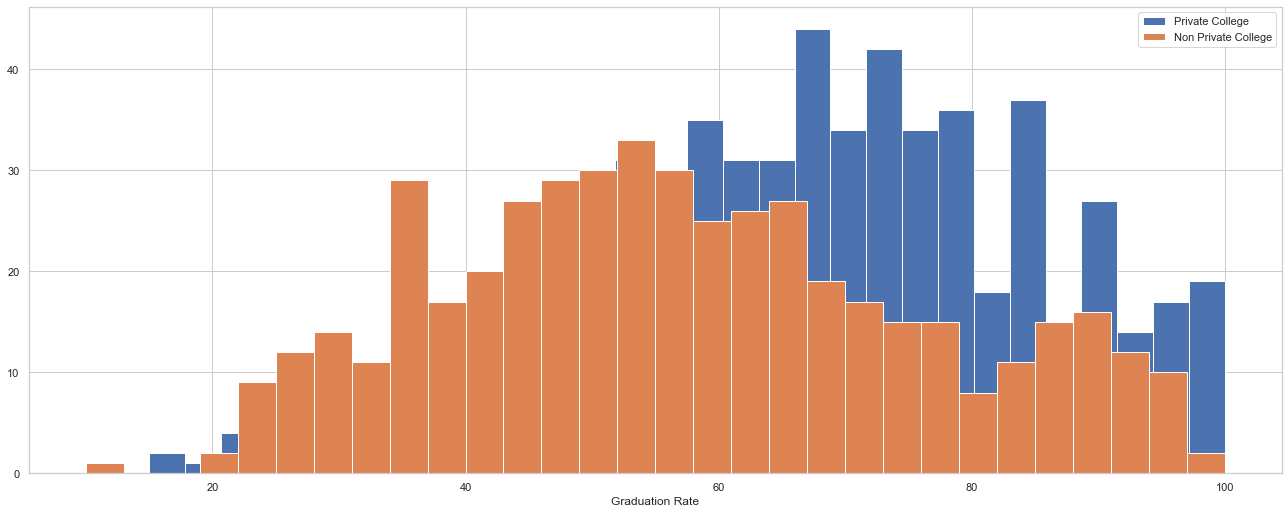

In [19]:
plt.figure(figsize=(20, 8))

data.loc[data.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=30)
data.loc[data.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=30)

plt.xlabel('Graduation Rate')
plt.legend()

<AxesSubplot:xlabel='apps', ylabel='Density'>

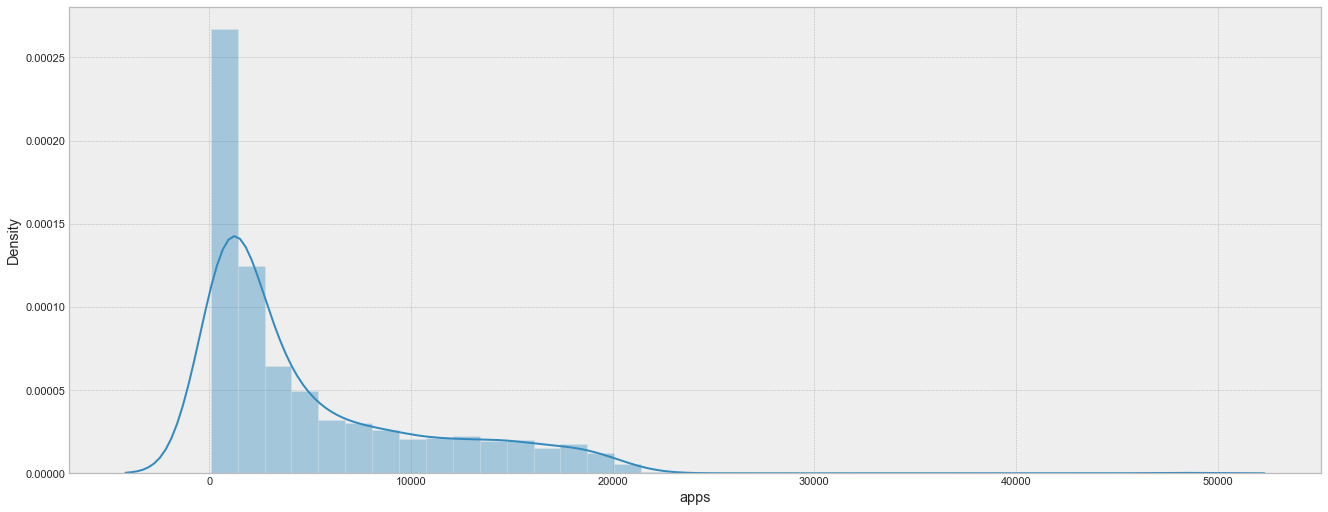

In [20]:
# Distribution plot of applications
plt.figure(figsize=(20,8))
plt.style.use('bmh')
sns.distplot(data['apps'])

<AxesSubplot:xlabel='private', ylabel='books'>

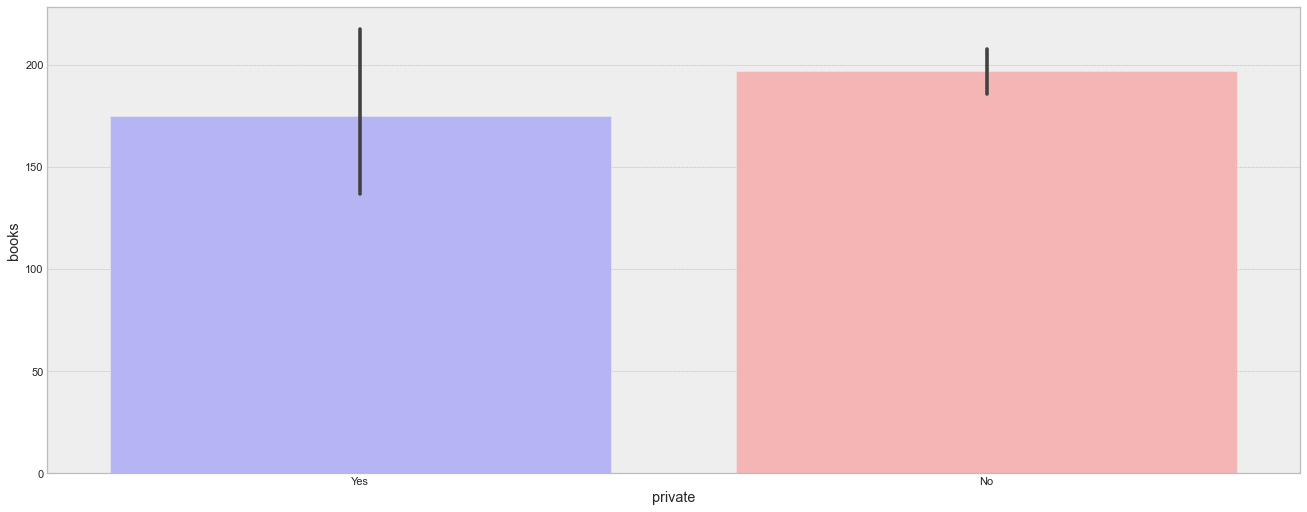

In [21]:
sns.barplot(x='private',y='books',data=data,estimator=np.std, palette="bwr")

In [22]:
# Pembagian Data
data.private.value_counts()

Yes    565
No     482
Name: private, dtype: int64

## K-Means Algorithm

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)

In [24]:
kmeans.fit(data.drop('private', axis=1))

KMeans(n_clusters=2)

In [25]:
kmeans.cluster_centers_

array([[12351.94719472,  9537.64026403,  6857.15511551,    43.11881188,
           57.87458746, 12757.46534653,  5606.66336634,  6563.10231023,
         3775.65016502,   596.85478548,  2084.47854785,    61.70957096,
           76.11221122,    18.52640264,    15.92739274,  9854.08250825,
           59.08580858],
       [ 2148.60752688,  1459.48387097,   610.26747312,    27.9327957 ,
           54.75672043,  2749.61962366,   834.95026882, 10363.43548387,
         4321.36155914,   549.81317204,  1330.49596774,    70.26747312,
           77.98252688,    14.17956989,    22.92473118,  9632.25268817,
           65.16263441]])

In [26]:
data['private'] = data.private.astype("category").cat.codes

In [27]:
data.private

0       1
1       1
2       1
3       1
4       1
       ..
1042    0
1043    0
1044    0
1045    0
1046    0
Name: private, Length: 1047, dtype: int8

In [28]:
data.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  
0      18.10           12    7041         60  
1      12.20           16   10527         56  
2      12.90           30    8735         54  
3       7.70           37   19016         59  
4      11.90            2   10922         15

In [29]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(data.private, labels))
print(classification_report(data.private, labels))

[[295 187]
 [  8 557]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75       482
           1       0.75      0.99      0.85       565

    accuracy                           0.81      1047
   macro avg       0.86      0.80      0.80      1047
weighted avg       0.85      0.81      0.81      1047



In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(data.private, labels))
print(pd.DataFrame(classification_report(data.private, labels, output_dict=True)))

0.8137535816618912
               0      1  accuracy  macro avg  weighted avg
precision   0.97   0.75      0.81       0.86          0.85
recall      0.61   0.99      0.81       0.80          0.81
f1-score    0.75   0.85      0.81       0.80          0.81
support   482.00 565.00      0.81    1047.00       1047.00


In [32]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X = data.drop('private', axis=1)
y = data.private

X = scalar.fit_transform(X)

kmeans = KMeans(2)
kmeans.fit(X)

print(kmeans.cluster_centers_)

print(accuracy_score(y, labels))
print(confusion_matrix(y, labels))
print(classification_report(y, labels))

[[ 1.12856473  1.18846888  1.20487394  0.55942208  0.0848797   1.14881387
   1.12606742 -0.73045523 -0.41206927  0.20004593  0.69320267 -0.37461685
  -0.16650473  0.74401603 -0.44679153 -0.01644417 -0.31625377]
 [-0.50574685 -0.53259186 -0.53994351 -0.25069537 -0.03803738 -0.51482116
  -0.50462772  0.32734093  0.18466175 -0.08964714 -0.31064684  0.16787809
   0.07461623 -0.33341797  0.20022193  0.00736917  0.14172368]]
0.8137535816618912
[[295 187]
 [  8 557]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75       482
           1       0.75      0.99      0.85       565

    accuracy                           0.81      1047
   macro avg       0.86      0.80      0.80      1047
weighted avg       0.85      0.81      0.81      1047



In [33]:
data["Clus_km"] = labels
data.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0        1  1660    1232     721         23         52         2885   
1        1  2186    1924     512         16         29         2683   
2        1  1428    1097     336         22         50         1036   
3        1   417     349     137         60         89          510   
4        1   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  Clus_km  
0      18.10           12    7041         60        1  
1      12.20           16   10527         56        1  
2      12.90           30    8735         54        1  
3       7.70           37   19016         59        1  
4      11.90            2   10922         15        1

In [34]:
data.tail()

private   apps  accept  enroll  top10perc  top25perc  f_undergrad  \
1042        0  10818    8654    6924         63         76        13436   
1043        0   2106    1685    1348         67         80        14883   
1044        0  13618   10894    8716         78         94         9625   
1045        0  16465   13172   10538         54         65        19854   
1046        0   4395    3516    2813         49         59        18009   

      p_undergrad  outstate  room_board  books  personal  phd  terminal  \
1042        10531      7236        5026    414      1471   70        75   
1043         1873      6329        3545    483      3153   34        68   
1044         7230      6953        4853    716      3567   32        84   
1045        10677      5719        3231    911      2885   69        88   
1046         6256      4112        5136    293      2361   98        81   

      s_f_ratio  perc_alumni  expend  grad_rate  Clus_km  
1042      23.40           10   11226         66        0  
1043      16.70            6    5988         68        1  
1044      22.40           30    8048         27        0  
1045      13.60            7   11967         92        0  
1046      24.10           12    7841         77        0

In [35]:
data.groupby('Clus_km').mean()

private     apps  accept  enroll  top10perc  top25perc  f_undergrad  \
Clus_km                                                                        
0           0.03 12351.95 9537.64 6857.16      43.12      57.87     12757.47   
1           0.75  2148.61 1459.48  610.27      27.93      54.76      2749.62   

         p_undergrad  outstate  room_board  books  personal   phd  terminal  \
Clus_km                                                                       
0            5606.66   6563.10     3775.65 596.85   2084.48 61.71     76.11   
1             834.95  10363.44     4321.36 549.81   1330.50 70.27     77.98   

         s_f_ratio  perc_alumni  expend  grad_rate  
Clus_km                                             
0            18.53        15.93 9854.08      59.09  
1            14.18        22.92 9632.25      65.16

## Memprediksi jumlah cluster terbaik : Elbow Method

In [54]:
data = pd.read_csv(r'C:\Users\hp\Downloads\UAS DATA ANALYSIS\data_uas.csv')
data.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  
0      18.10           12    7041         60  
1      12.20           16   10527         56  
2      12.90           30    8735         54  
3       7.70           37   19016         59  
4      11.90            2   10922         15

In [55]:
#Scaling Features
features_1 = ['outstate','grad_rate']

In [56]:
features_2 = ['outstate','room_board','expend', 'personal','grad_rate']

In [57]:
select_cost1 = data[features_1]

In [58]:
select_cost2 = data[features_2]

In [59]:
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(select_cost1)
x2 = StandardScaler().fit_transform(select_cost2)

In [60]:
km = KMeans(2)

In [61]:
km.fit(data.drop('private', axis=1))

KMeans(n_clusters=2)

In [62]:
print(kmeans.cluster_centers_)

[[-0.73636433 -0.62895615  0.15595408  1.60746882  0.89560543]
 [ 0.79644261  0.16221334  0.01928461 -0.70924866  0.76610321]
 [ 2.02122079  1.3419598   1.38154108 -0.70764026  0.97114336]
 [ 0.6535579   1.45362837  0.0395744  -0.47091897  0.37464205]
 [-0.87383115 -1.15439028 -0.54293009  0.07590593 -0.97059957]
 [-0.39691182 -0.00864746 -0.23700862 -0.54201616 -0.93176776]
 [ 2.1483239   1.59307282  5.16780071 -0.29275577  1.46424363]
 [-0.77328656 -0.38799033 -0.10190407  1.89403325 -1.2523033 ]
 [-0.49872208 -0.60140832 -0.49976889 -0.50789629  0.53973678]
 [-0.1172062   0.16090466 -0.23052818  0.4876253  -0.02960412]]


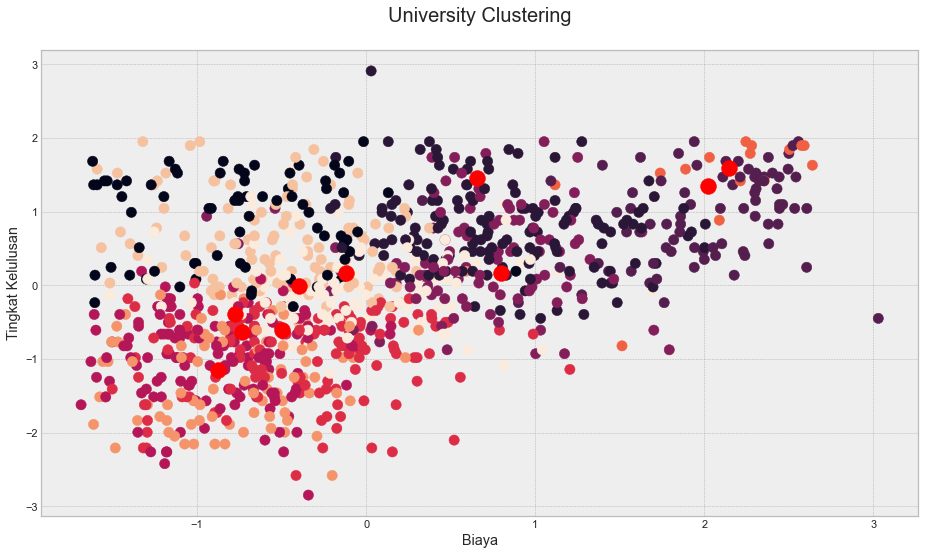

In [63]:

plt.figure(figsize = (14, 8))

plt.scatter(x1[:, 0], x1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('University Clustering\n', fontsize = 20)
plt.xlabel('Biaya')
plt.ylabel('Tingkat Kelulusan')
plt.show()

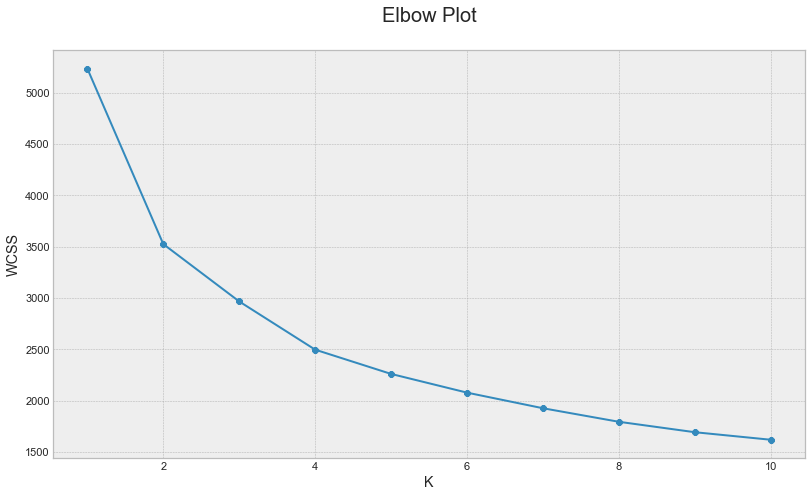

In [64]:
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

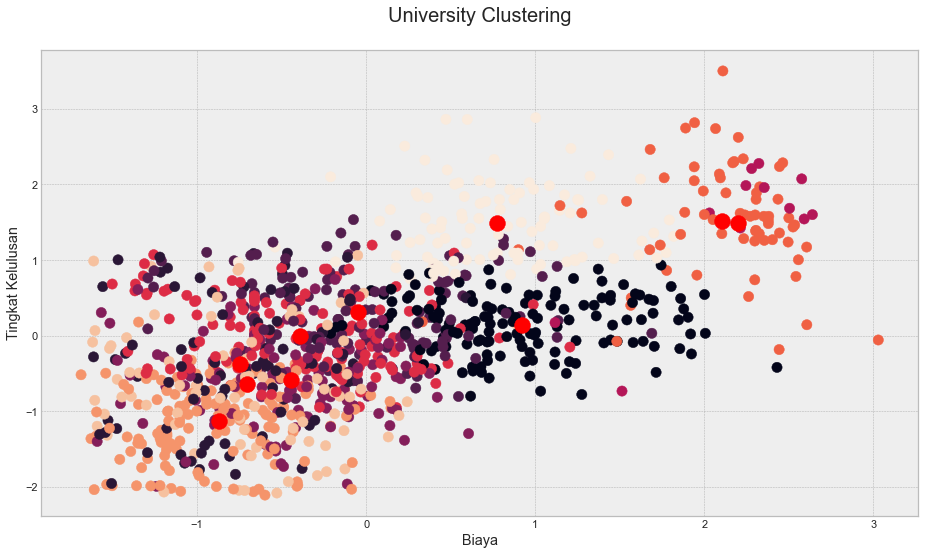

In [65]:
plt.figure(figsize = (14, 8))

plt.scatter(x2[:, 0], x2[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('University Clustering\n', fontsize = 20)
plt.xlabel('Biaya')
plt.ylabel('Tingkat Kelulusan')
plt.show()

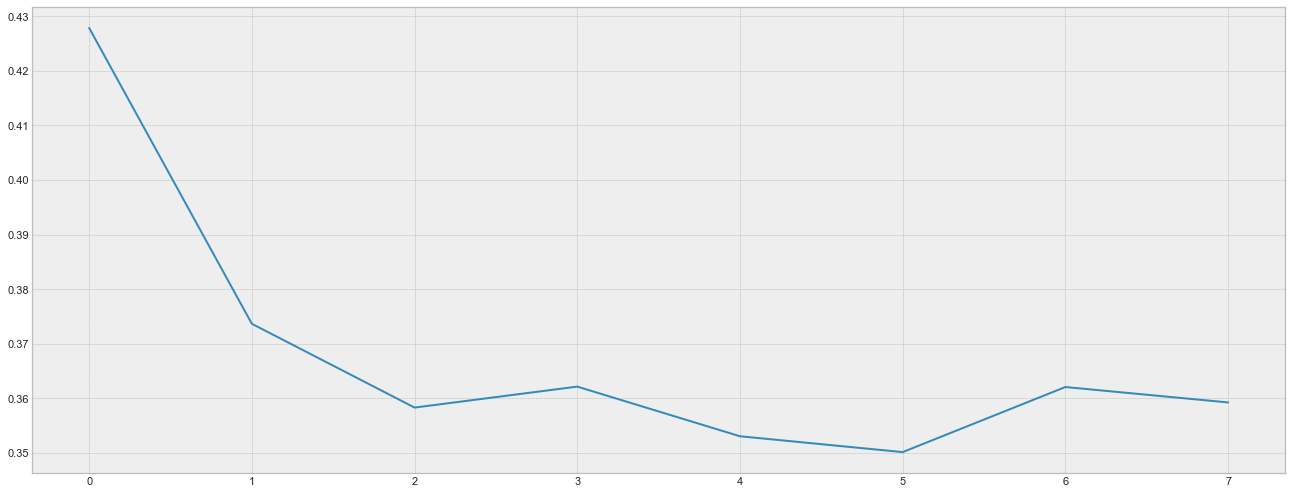

In [66]:
#Silhouette Score select_cost1
from sklearn.metrics import silhouette_score
sil = []

for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state=0).fit(x1)
    labels = kmeans.labels_
    sil.append(silhouette_score(x1, labels, metric = 'euclidean'))
    
plt.plot(sil)

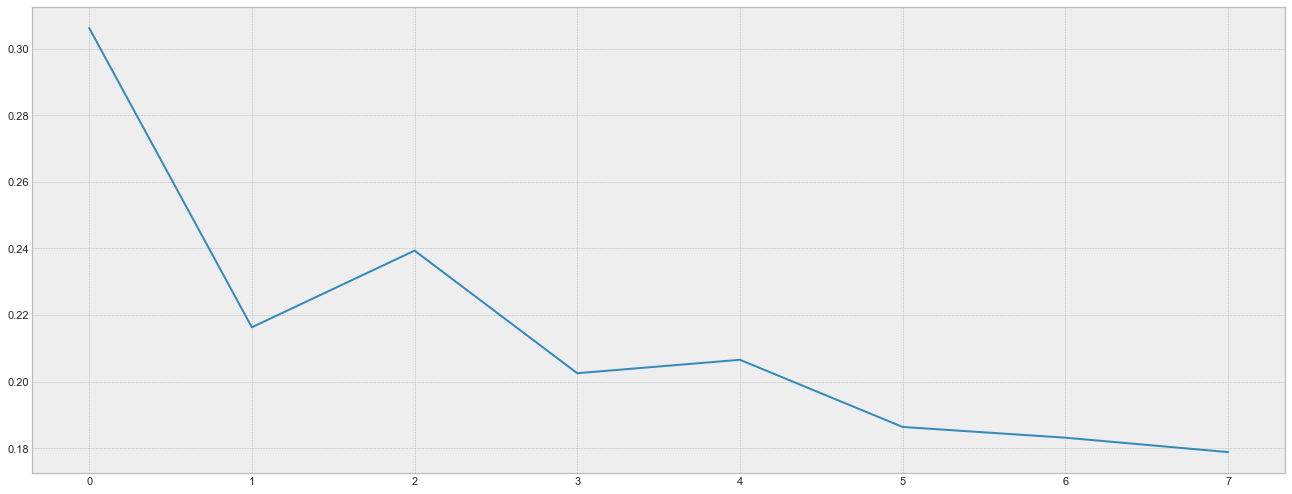

In [67]:
#Silhouette Score select_cost2
from sklearn.metrics import silhouette_score
sil = []

for k in range(2,10):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(x2)
    labels = kmeans.labels_
    sil.append(silhouette_score(x2, labels, metric = 'euclidean'))
    
plt.plot(sil)

In [68]:
#Modeling
kmeans1 = KMeans(n_clusters= 2, random_state=0)
kmeans2 = KMeans(n_clusters= 3, random_state=0)
label1 = kmeans1.fit_predict(x1)
label2 = kmeans2.fit_predict(x2)

In [69]:
score = silhouette_score(x1, kmeans1.labels_, metric='euclidean')
print('Silhouette Score 1: %.3f' % score)

Silhouette Score 1: 0.428


In [70]:
score = silhouette_score(x2, kmeans1.labels_, metric='euclidean')
print('Silhouette Score 2: %.3f' % score)

Silhouette Score 2: 0.259


In [71]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = data [['outstate' , 'grad_rate' ]]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN (eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np. zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db. labels_
data[ "Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
data[ [ 'outstate','room_board','expend', 'personal','grad_rate']].head(5)

outstate  room_board  expend  personal  grad_rate
0      7440        3300    7041      2200         60
1     12280        6450   10527      1500         56
2     11250        3750    8735      1165         54
3     12960        5450   19016       875         59
4      7560        4120   10922      1500         15

In [72]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8}

In [73]:
data["Clus_db"] = labels
data.head()

private  apps  accept  enroll  top10perc  top25perc  f_undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   p_undergrad  outstate  room_board  books  personal  phd  terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   s_f_ratio  perc_alumni  expend  grad_rate  Clus_Db  Clus_db  
0      18.10           12    7041         60        0        0  
1      12.20           16   10527         56       -1       -1  
2      12.90           30    8735         54        5        5  
3       7.70           37   19016         59       -1       -1  
4      11.90            2   10922         15       -1       -1

In [74]:
data.tail()

private   apps  accept  enroll  top10perc  top25perc  f_undergrad  \
1042      No  10818    8654    6924         63         76        13436   
1043      No   2106    1685    1348         67         80        14883   
1044      No  13618   10894    8716         78         94         9625   
1045      No  16465   13172   10538         54         65        19854   
1046      No   4395    3516    2813         49         59        18009   

      p_undergrad  outstate  room_board  books  personal  phd  terminal  \
1042        10531      7236        5026    414      1471   70        75   
1043         1873      6329        3545    483      3153   34        68   
1044         7230      6953        4853    716      3567   32        84   
1045        10677      5719        3231    911      2885   69        88   
1046         6256      4112        5136    293      2361   98        81   

      s_f_ratio  perc_alumni  expend  grad_rate  Clus_Db  Clus_db  
1042      23.40           10   11226         66        0        0  
1043      16.70            6    5988         68        0        0  
1044      22.40           30    8048         27       -1       -1  
1045      13.60            7   11967         92       -1       -1  
1046      24.10           12    7841         77       -1       -1

In [75]:
data.groupby('Clus_db').mean()

apps  accept  enroll  top10perc  top25perc  f_undergrad  \
Clus_db                                                              
-1      5786.89 4239.45 2780.32      36.85      58.65      5738.96   
 0      4558.19 3472.25 2137.38      27.70      52.34      5766.38   
 1      3271.73 2558.64 1747.82      20.73      43.36      4705.82   
 2      2397.70 1742.20  581.10      41.20      72.70      2359.80   
 3      1982.33 1503.50  525.50      27.83      60.50      1962.67   
 4      4143.60 2244.95  650.55      54.90      86.30      2439.50   
 5      1386.00 1099.93  424.20      20.80      49.93      1896.73   
 6      4861.71 3774.21 2644.14      20.43      38.43      7533.00   
 7      8985.60 6942.30 5330.70      34.50      51.20      8118.30   
 8      9051.90 7175.10 5646.40      31.60      42.00      8937.40   

         p_undergrad  outstate  room_board  books  personal   phd  terminal  \
Clus_db                                                                       
-1           2393.76   9973.29     4346.30 567.82   1534.18 67.68     78.55   
 0           2123.70   8377.83     3955.20 561.70   1583.55 67.23     75.86   
 1           1470.36   4661.64     3222.00 553.09   1732.27 65.73     77.73   
 2            379.90  13884.90     4503.20 527.50    944.40 81.10     87.00   
 3            787.17  12876.67     5378.33 458.33   1450.00 79.17     83.83   
 4            220.35  18816.00     5791.00 608.40    946.00 91.40     96.45   
 5            514.00  10868.53     4224.07 535.33   1374.73 63.87     73.67   
 6           3263.14   4396.50     3270.50 500.71   1696.79 56.64     67.07   
 7           3451.30   6529.20     3908.60 516.10   2073.60 60.40     73.70   
 8           5536.60   4187.70     3554.20 635.40   1770.20 63.60     72.20   

         s_f_ratio  perc_alumni   expend  grad_rate  Clus_Db  
Clus_db                                                       
-1           15.20        22.16 10758.02      67.82    -1.00  
 0           15.75        19.05  8340.99      58.30     0.00  
 1           16.98        14.55  7388.64      45.09     1.00  
 2           13.33        29.40 10709.00      82.10     2.00  
 3           13.38        24.83  9723.83      83.50     3.00  
 4            9.97        43.30 20896.80      90.65     4.00  
 5           13.12        20.87  8599.27      53.67     5.00  
 6           19.49        12.93  5911.43      58.21     6.00  
 7           19.30        18.60  8529.30      84.70     7.00  
 8           18.37        14.50 11254.50      34.60     8.00

In [76]:
features_1 = ['outstate','grad_rate']

In [77]:
features_2 = ['outstate','room_board','expend', 'personal','grad_rate']

In [78]:
select_cost1 = data[features_1]

In [79]:
select_cost2 = data[features_2]

In [80]:
from sklearn.preprocessing import StandardScaler
x1 = StandardScaler().fit_transform(select_cost1)
x2 = StandardScaler().fit_transform(select_cost2)

In [81]:
db = DBSCAN(2)

In [82]:
db.fit(data.drop('private', axis=1))

DBSCAN(eps=2)

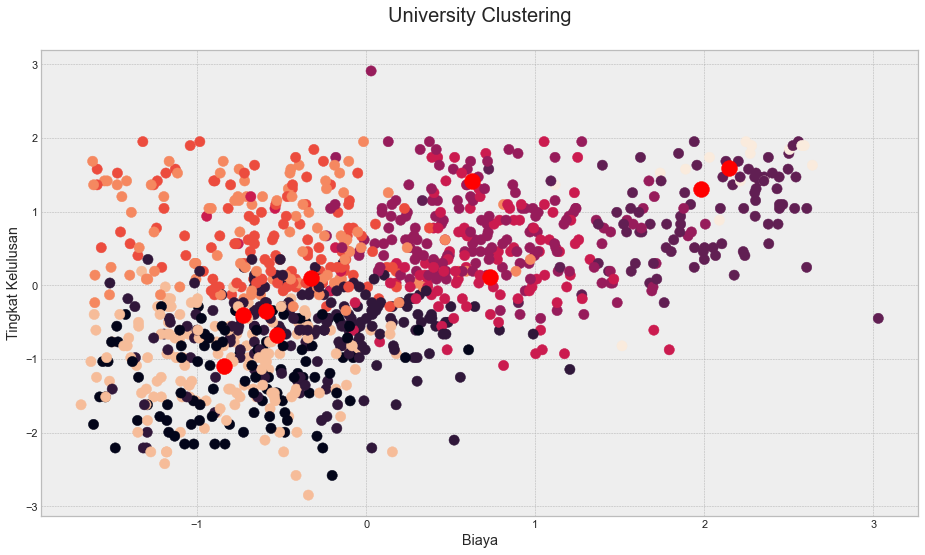

In [83]:
plt.figure(figsize = (14, 8))

plt.scatter(x1[:, 0], x1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('University Clustering\n', fontsize = 20)
plt.xlabel('Biaya')
plt.ylabel('Tingkat Kelulusan')
plt.show()

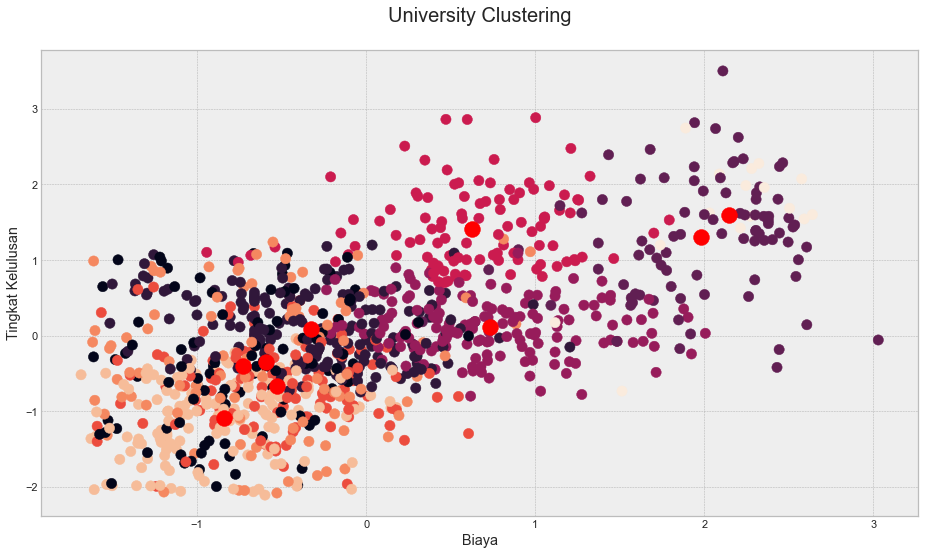

In [84]:
plt.figure(figsize = (14, 8))

plt.scatter(x2[:, 0], x2[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('University Clustering\n', fontsize = 20)
plt.xlabel('Biaya')
plt.ylabel('Tingkat Kelulusan')
plt.show()

In [88]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline


In [89]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750,\
                            centers=centers,\
                            cluster_std=0.4,\
                            random_state=0)

In [90]:
X = StandardScaler().fit_transform(X)


In [91]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [94]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626
